In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

# 載入 MNIST 手寫阿拉伯數字資料
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# 訓練/測試資料的 X/y 維度
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [2]:
# 訓練資料前10筆圖片的數字
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [3]:
# 顯示第1張圖片內含值
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

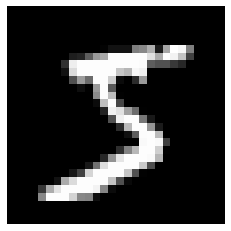

In [4]:
# 顯示第1張圖片圖像
import matplotlib.pyplot as plt

# 第一筆資料
X2 = x_train[0,:,:]

# 繪製點陣圖，cmap='gray':灰階
plt.imshow(X2.reshape(28,28), cmap='gray')

# 隱藏刻度
plt.axis('off') 

# 顯示圖形
plt.show() 

In [5]:
# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# 顏色範圍：0~255，所以，公式簡化為 x / 255
# 注意，顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
# 建立模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(64, activation='PReLU'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [10]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# 模型訓練
history = model.fit(x_train_norm, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 2s 982us/step - loss: 0.3703 - accuracy: 0.8942 - val_loss: 0.1795 - val_accuracy: 0.9491
Epoch 2/10
1500/1500 [==============================] - 1s 903us/step - loss: 0.1815 - accuracy: 0.9467 - val_loss: 0.1308 - val_accuracy: 0.9635
Epoch 3/10
1500/1500 [==============================] - 1s 954us/step - loss: 0.1384 - accuracy: 0.9587 - val_loss: 0.1171 - val_accuracy: 0.9655
Epoch 4/10
1500/1500 [==============================] - 1s 904us/step - loss: 0.1180 - accuracy: 0.9638 - val_loss: 0.1003 - val_accuracy: 0.9701
Epoch 5/10
1500/1500 [==============================] - 1s 930us/step - loss: 0.1000 - accuracy: 0.9689 - val_loss: 0.0957 - val_accuracy: 0.9717
Epoch 6/10
1500/1500 [==============================] - 1s 973us/step - loss: 0.0914 - accuracy: 0.9714 - val_loss: 0.0921 - val_accuracy: 0.9720
Epoch 7/10
1500/1500 [==============================] - 1s 925us/step - loss: 0.0811 - accuracy: 0.9749 - val_loss: 0.0854 -

In [12]:
# 檢查 history 所有鍵值
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

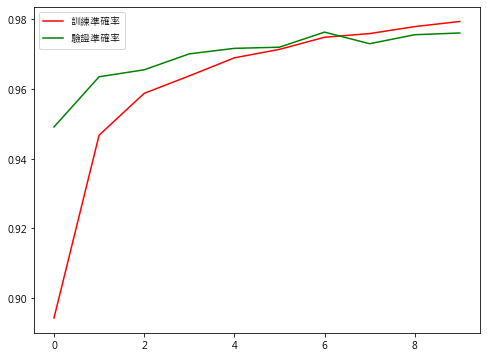

In [13]:
# 對訓練過程的準確率繪圖
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], 'r', label='訓練準確率')
plt.plot(history.history['val_accuracy'], 'g', label='驗證準確率')
plt.legend()

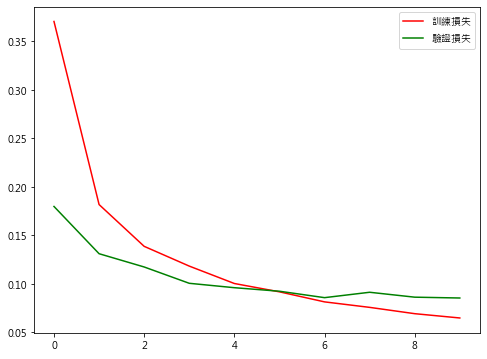

In [14]:
# 對訓練過程的損失繪圖
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], 'r', label='訓練損失')
plt.plot(history.history['val_loss'], 'g', label='驗證損失')
plt.legend()

In [15]:
# 評分(Score Model)
score=model.evaluate(x_test_norm, y_test, verbose=0)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

loss: 0.0797
accuracy: 0.9768


In [19]:
# 使用小畫家，繪製 0~9，實際測試看看
from skimage import io
from skimage.transform import resize
import numpy as np

# 讀取影像並轉為單色
uploaded_file = './myDigits/2.png'
image1 = io.imread(uploaded_file, as_gray=True)

# 縮為 (28, 28) 大小的影像
image_resized = resize(image1, (28, 28), anti_aliasing=True)    
X1 = image_resized.reshape(1,28, 28) #/ 255

# 反轉顏色，顏色0為白色，與 RGB 色碼不同，它的 0 為黑色
X1 = np.abs(1-X1)

# 預測
predictions = np.argmax(model.predict(X1), axis=-1)
print(predictions)

[2]


In [20]:
# 建立模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='PReLU'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [21]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# 模型訓練
history = model.fit(x_train_norm, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3180 - accuracy: 0.9067 - val_loss: 0.1530 - val_accuracy: 0.9571
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1492 - accuracy: 0.9568 - val_loss: 0.1151 - val_accuracy: 0.9660
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1132 - accuracy: 0.9657 - val_loss: 0.0939 - val_accuracy: 0.9730
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0925 - accuracy: 0.9716 - val_loss: 0.0853 - val_accuracy: 0.9742
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0784 - accuracy: 0.9756 - val_loss: 0.0813 - val_accuracy: 0.9756
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0720 - accuracy: 0.9776 - val_loss: 0.0870 - val_accuracy: 0.9750
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0635 - accuracy: 0.9797 - val_loss: 0.0759 - val_accuracy: